In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt

n = 2000

# Generem dades fictícies
np.random.seed(25)
count = defaultdict(int)
preus = defaultdict(list)
restaurants = [f"Restaurant {i}" for i in range(1, n +1)]
# preus = np.round(np.random.normal(0, 1, n), 2)
ciutats = np.sort(np.random.choice(["Barcelona", "Madrid", "València", "Sevilla", "San Sebastián"], n))

for i in ciutats:
    count[i] += 1
    

for k in count.keys():
    if k == "Barcelona":
        preus[k] = np.round(30*np.random.beta(7, 2.5, count[k]), 2)
    if k == "Madrid":
        preus[k] = np.round(np.random.normal(20, 4, count[k]), 2)
    if k == "València":
        preus[k] = np.round(np.random.gamma(16, 1.1, count[k]), 2)
    if k == "Sevilla":
        preus[k] = np.round(np.random.gamma(18.5, 0.85, count[k]), 2)
    if k == "San Sebastián":
        preus[k] = np.round(np.random.normal(25, 4.2, count[k]), 2)


args = (preus['Barcelona'],preus['Donosti'],preus['Madrid'],preus['San Sebastián'],preus['Sevilla'],preus['València'])

preus_tot = np.concatenate(args)

# Creem el DataFrame
df = pd.DataFrame({"Restaurant": restaurants, "Preu (€)": preus_tot, "Ciutat": ciutats})
df = df[df["Preu (€)"] >9]
df = df[df["Preu (€)"] <35]

# Mostrem les primeres files
# print(df.head())



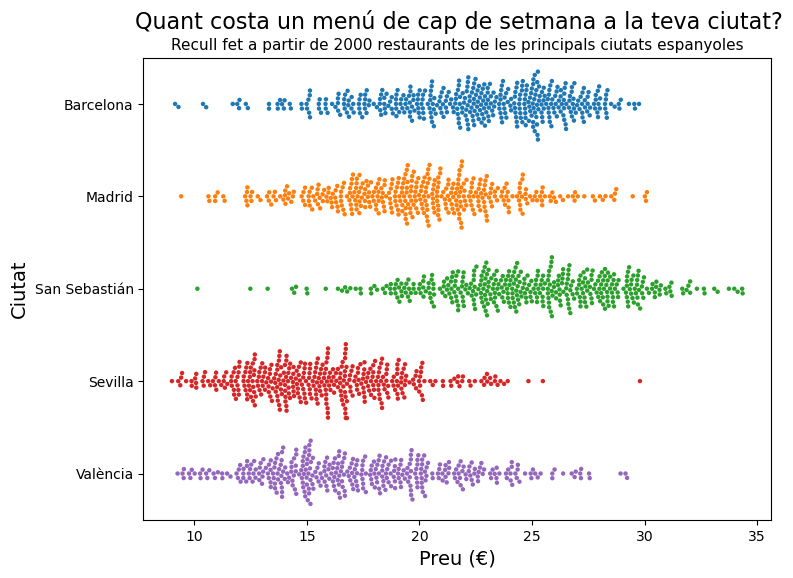

In [45]:
plt.figure(figsize=(8.1, 6))
sns.swarmplot(data=df, x="Preu (€)", y="Ciutat", hue="Ciutat", legend=False, size= 3.2)

# Afegir títol i etiquetes
plt.suptitle("Quant costa un menú de cap de setmana a la teva ciutat?",x= 0.515, y=0.96, fontsize=16)
plt.ylabel("Ciutat", fontsize = 14)
plt.xlabel("Preu (€)", fontsize = 14)
plt.title("Recull fet a partir de 2000 restaurants de les principals ciutats espanyoles", fontsize=11)
plt.savefig('beeswarm_menus.png')
